# Introduction

In [41]:
import pandas as pd
import sqlite3 
import matplotlib as plt
import seaborn as sns
conn = sqlite3.connect('factbook.db')
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [42]:
q1 = 'SELECT * FROM facts LIMIT 5'
pd.read_sql_query(q1, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Summary Statistics

In [43]:
q2 = 'SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts'
pd.read_sql_query(q2, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


# Outliers

In [44]:
q3 = 'SELECT name, MIN(population) FROM facts'
pd.read_sql_query(q3, conn)


,name,MIN(population)
0,Antarctica,0


In [45]:
q4 = 'SELECT name, MAX(population) FROM facts'
pd.read_sql_query(q4, conn)

,name,MAX(population)
0,World,7256490011


The country with the lowest population(0) is Antarctica and the World has a population of over 7.2 billion people

# Histograms

In [46]:
q5 = 'SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE name NOT IN ("World", "Antarctica")'
df = pd.read_sql_query(q5, conn)
df

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49
5,92436.0,1.24,15.85,5.69
6,43431886.0,0.93,16.64,7.33
7,3056382.0,0.15,13.61,9.34
8,22751014.0,1.07,12.15,7.14
9,8665550.0,0.55,9.41,9.42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f49cbe0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9634e0>]], dtype=object)

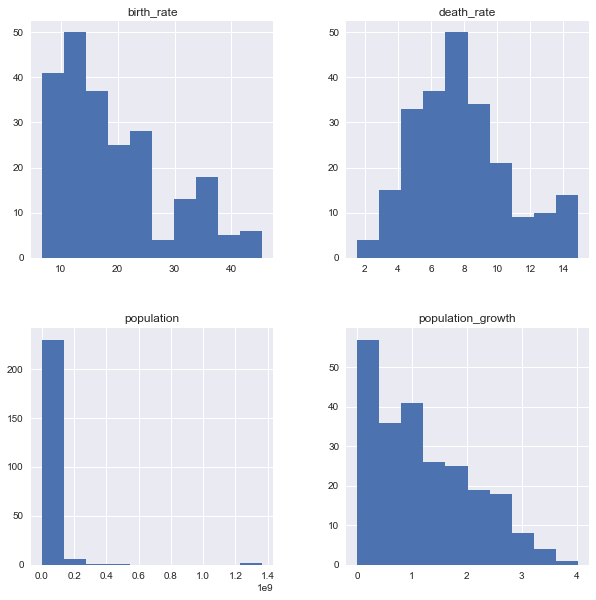

In [60]:
%matplotlib inline
sns.set()
df.hist(figsize=(10,10))
    

# Population Density

In [86]:
q7 = 'SELECT name, ROUND(CAST(population as float) / CAST(area_land as float), 3) population_density FROM facts ORDER BY population_density DESC'
df1 = pd.read_sql_query(q7, conn)
df1 = df1.dropna()
df1

,name,population_density
0,Macau,21168.964
1,Monaco,15267.500
2,Singapore,8259.785
3,Hong Kong,6655.271
4,Gaza Strip,5191.819
5,Gibraltar,4876.333
6,Bahrain,1771.859
7,Maldives,1319.641
8,Malta,1310.016
9,Bermuda,1299.926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a279e6198>]], dtype=object)

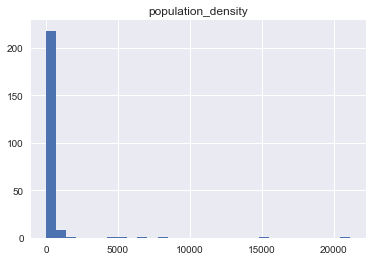

In [109]:
df1.hist(bins=30)

# Land and Water

In [90]:
q8 = 'SELECT name, ROUND(CAST(area_water as float) / CAST(area_land as float), 3) water_to_land FROM facts ORDER BY water_to_land DESC'
df2 = pd.read_sql_query(q8, conn)
df2 = df2.dropna()
df2

,name,water_to_land
0,British Indian Ocean Territory,905.667
1,Virgin Islands,4.520
2,Puerto Rico,0.555
3,"Bahamas, The",0.387
4,Guinea-Bissau,0.285
5,Malawi,0.259
6,Netherlands,0.226
7,Uganda,0.223
8,Eritrea,0.164
9,Liberia,0.156


The only two areas with more water than land are, unsurprisingly, the British Indian Ocean Territory, and the Virgin Islands.